In [2]:
import numpy as np
import matplotlib.pyplot as plt

/home/yuri/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [19]:
# Find the lowest frequency that not influences the amplitude of main signal of 50 Hz
freq = 1000
tau = 1 / (2 * np.pi * freq)
print(f"tau value: {(tau*10**6):.2f} us")

# Transfer function of the RC low-pass filter
def H(f):
    return 1 / np.sqrt(1 + (2 * np.pi * f * tau) ** 2)

# Target attenuation (99% of input)
target_gain = 0.99

# Frequency range to search (1 Hz to 1 MHz)
f = np.logspace(0, 6, int(1e5))

# Compute magnitude response
Hf = H(f)

# Find the frequency where gain drops to 0.99
idx = np.argmax(Hf <= target_gain)
f_1percent = f[idx]

print(f"1% attenuation frequency: {f_1percent:.2f} Hz")


tau value: 159.15 us
1% attenuation frequency: 142.51 Hz


In [21]:
# Translate tau into number of samples
sampling_period_us = 180
tau_us = 160
d = tau_us / sampling_period_us

# Calculate x coeficient for a digital filter
x_calc = np.exp(-1 / d)

print(f"x value: {x:.2f}")

x value: 0.32


In [28]:
# Simulate amplitude measurement for three signals

# Filter parameters
x = 0.32
a0 = 1 - x
b1 = x
print(f"Filter parameters: a0 = {a0:.2f}; b1 = {b1:.2f}")

def filter_signal(x, a0, b1):
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = a0 * x[i] + b1 * y[i - 1]
    return y

def plot_signals(original, filtered, title):
    plt.figure(figsize=(10, 4))
    plt.plot(original, label='Original Signal')
    plt.plot(filtered, label='Filtered Signal', linestyle='--')
    plt.title(f'{title}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'plots/{title}.png')
    plt.show()

def proceed_signal(x, title):
    y = filter_signal(x, a0, b1)
    max_y = np.max(y)
    print(f'Max filtered value for "{title}": {max_y:.2f}')
    plot_signals(x, y, title)

# Signal parameters
amplitude = 100
points = 160
periods = 3
t = np.linspace(0, 2 * np.pi * periods, points)

Filter parameters: a0 = 0.68; b1 = 0.32


Max filtered value for "Sine wave": 99.46


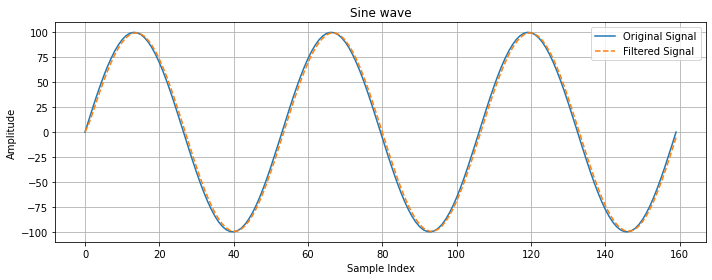

In [29]:
# Signal 1: pure sine wave
signal1 = amplitude * np.sin(t)

proceed_signal(signal1, "Sine wave")

Max filtered value for "Half-wave rectified": 99.46


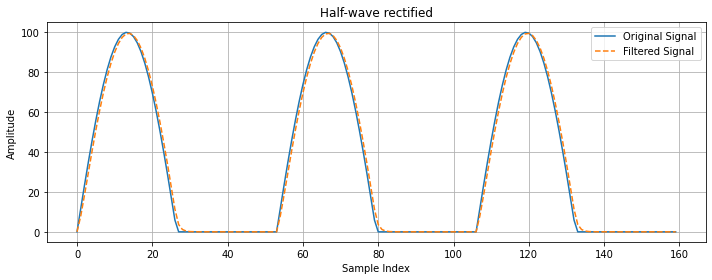

In [30]:
# Signal 2: half-wave rectified
signal2 = np.where(signal1 > 0, signal1, 0)

proceed_signal(signal2, "Half-wave rectified")

Max filtered value for "Half-wave rectified with phase shift": 99.46


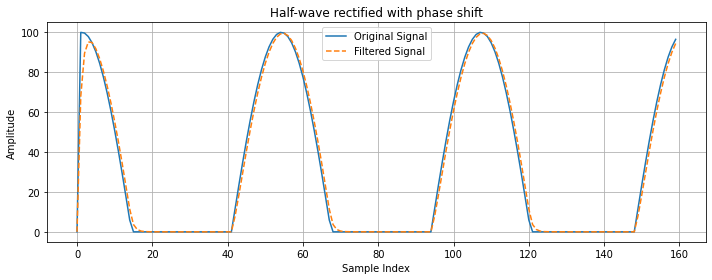

In [31]:
# Signal 3: phase shifted + first sample zero
signal3 = np.roll(signal2, shift=-12)
signal3[0] = 0

proceed_signal(signal3, "Half-wave rectified with phase shift")